Author:Gaser Maged Moussa 
Task1 for GRIPMARCH22 by The Sparks Foundation

In [59]:
# Load packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
%matplotlib inline

Data Exploration

In [60]:
# Load data from the csv file
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
# Understand the variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Viz

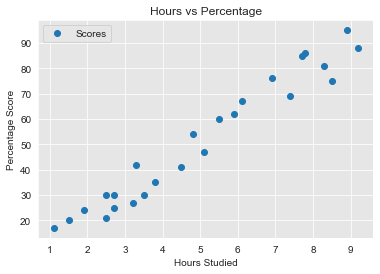

In [62]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Preparing Training and Validation datasets

In [63]:
# Split the data into X and y
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 44)

Training the model

In [64]:
from sklearn.linear_model import LinearRegression  
regressor.fit(X_train, y_train) 
y_predict= regressor.predict(X_train)
print("Training complete.")

Training complete.


Testing the model

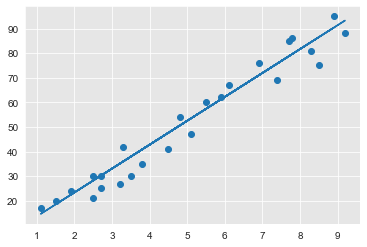

In [65]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [66]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.8452957313514895
Training Score
0.9610095037611212


In [67]:
y_test

array([69, 27, 62, 47, 30], dtype=int64)

In [68]:
y_predict

array([18.52592262, 47.64906568, 40.85366563, 28.23363697, 50.56137999,
       63.18140865, 30.17517984, 93.27532315, 14.64283687, 57.35678003,
       84.53838023, 78.71375161, 90.36300884, 79.68452305, 28.23363697,
       70.94758013, 35.99980845, 22.40900836, 86.4799231 , 30.17517984])

In [69]:
df_plot = pd.DataFrame({'Actual':y_test, 'predicted':y_predict[:5]})
df_plot

,Actual,predicted
0,69,18.525923
1,27,47.649066
2,62,40.853666
3,47,28.233637
4,30,50.561380


Prediction

In [70]:
#Score prediction for 9.25 hours
print('Score of student who studied for 9.25hrs/day', regressor.predict([[9.25]]))

Score of student who studied for 9.25hrs/day [93.76070886]


Model Evaluation Metrics

In [71]:
#Checking the efficiency of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squ_error =mean_squared_error(y_test, y_predict[:5])
mean_abs_error =mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 839.2261173601797
Mean absolute Error: 26.319444089728847
